
### **`.ipynb file 1`** 



**Marks: 10**
1. Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
2. What is the effect of adding more neurons to each hidden layer?
3. What happens if we manipulate the value of dropout?
4. What is the effect of adding more hidden layer to the network?
5. What is the accuracy score if we use RMSprop for model 6?
6. Does manipulating the learning rate affect the model? Justify your answer.
7. What is the best parameter configuration for this project?


2.

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [11]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [10]:
import tensorflow as tf
from tensorflow import keras 

In [12]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255    # X_train = X_train / 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [15]:
model_1 = tf.keras.Sequential()
N_hidden = 250
model_1.add(Dense(N_hidden,name = 'dense_layer',input_shape = (784,),activation = 'relu'))
N_hiddens = 512
model_1.add(Dense(N_hiddens,name = 'dense_layer_2',activation = 'relu'))
model_1.add(Dense(10,name = 'dense_layer_3',activation = 'softmax'))

In [16]:
model_1.compile(optimizer = 'SGD',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [17]:
log_dir = "logs/fit/model1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_1.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback) 

Epoch 1/30
375/375 [==============================] - 2s 6ms/step - loss: 1.4048 - accuracy: 0.6668 - val_loss: 0.7063 - val_accuracy: 0.8511
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.5716 - accuracy: 0.8584 - val_loss: 0.4369 - val_accuracy: 0.8889
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4250 - accuracy: 0.8864 - val_loss: 0.3636 - val_accuracy: 0.8994
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3695 - accuracy: 0.8970 - val_loss: 0.3291 - val_accuracy: 0.9065
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3377 - accuracy: 0.9050 - val_loss: 0.3052 - val_accuracy: 0.9144
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3161 - accuracy: 0.9109 - val_loss: 0.2897 - val_accuracy: 0.9158
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2986 - accuracy: 0.9155 - val_loss: 0.2754 - val_accuracy: 0.9222
Epoch 

In [18]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 250)               196250    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               128512    
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                5130      
Total params: 329,892
Trainable params: 329,892
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


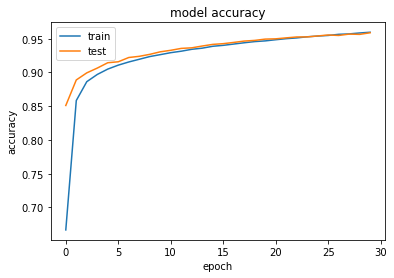

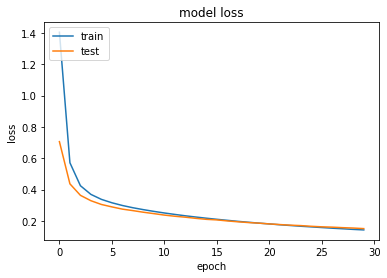

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training

print(training.history.keys())
# summarize training for accuracy

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# Evaluate the model
test_loss,test_acc = model_1.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9569
Test Accuracy: 0.9569000005722046


3

In [47]:
model_2 = tf.keras.Sequential()
N_hidden = 64
model_2.add(Dense(N_hidden,name = 'dense_layer',input_shape = (784,),activation = 'relu'))
model_2.add(Dropout(0.2))
#N_hiddens = 512
model_2.add(Dense(N_hiddens,name = 'dense_layer_2',activation = 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(10,name = 'dense_layer_3',activation = 'softmax'))

In [48]:
model_2.compile(optimizer = 'SGD',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [49]:
log_dir = "logs/fit/model2"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,histogram_freq = 1)
training = model_2.fit(X_train,Y_train,batch_size = 128,epochs = 30,validation_split = 0.2,callbacks = tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 2s 5ms/step - loss: 1.8828 - accuracy: 0.4359 - val_loss: 1.1327 - val_accuracy: 0.7698
Epoch 2/30
375/375 [==============================] - 2s 4ms/step - loss: 0.9519 - accuracy: 0.7239 - val_loss: 0.5833 - val_accuracy: 0.8543
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.6732 - accuracy: 0.7983 - val_loss: 0.4484 - val_accuracy: 0.8809
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.5642 - accuracy: 0.8303 - val_loss: 0.3888 - val_accuracy: 0.8957
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.4996 - accuracy: 0.8508 - val_loss: 0.3522 - val_accuracy: 0.9018
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 0.4582 - accuracy: 0.8641 - val_loss: 0.3277 - val_accuracy: 0.9073
Epoch 7/30
375/375 [==============================] - 2s 4ms/step - loss: 0.4314 - accuracy: 0.8728 - val_loss: 0.3095 - val_accuracy: 0.9120
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


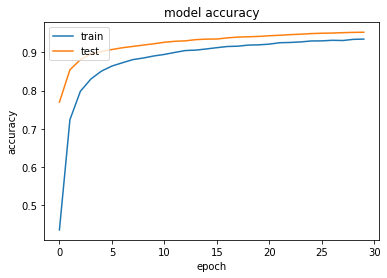

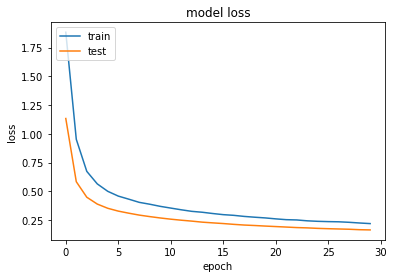

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

# List all data in training
print(training.history.keys())

#summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
test_loss,test_acc = model_2.evaluate(X_test,Y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 0s 955us/step - loss: 0.1633 - accuracy: 0.9523
Test accuracy: 0.9523000121116638


4,

In [51]:
model_4 = tf.keras.Sequential()
N_hidden = 512

model_4.add(Dense(N_hidden,name = 'dense_Layer',input_shape = (784,),activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden,name = 'dense_layer_2',activation = 'relu'))
model_4.add(Dropout(0.3))
# Adding another layer
model_4.add(Dense(N_hidden,name = 'dense_layer_3',activation = 'relu'))
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden,name = 'dense_layer_4',activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(10,name = 'dense_layer_5',activation = 'softmax'))

In [54]:
model_4.compile(optimizer = 'SGD',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [55]:
log_dir = "logs/fit/model4"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,histogram_freq = 1)
training = model_2.fit(X_train,Y_train,batch_size = 128,epochs = 30,validation_split = 0.2,callbacks = tensorboard_callback)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2175 - accuracy: 0.9355 - val_loss: 0.1611 - val_accuracy: 0.9541
Epoch 2/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2147 - accuracy: 0.9362 - val_loss: 0.1593 - val_accuracy: 0.9541
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2092 - accuracy: 0.9377 - val_loss: 0.1573 - val_accuracy: 0.9548
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2090 - accuracy: 0.9370 - val_loss: 0.1550 - val_accuracy: 0.9558
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2067 - accuracy: 0.9384 - val_loss: 0.1531 - val_accuracy: 0.9561
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2041 - accuracy: 0.9386 - val_loss: 0.1510 - val_accuracy: 0.9570
Epoch 7/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2004 - accuracy: 0.9410 - val_loss: 0.1497 - val_accuracy: 0.9574
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


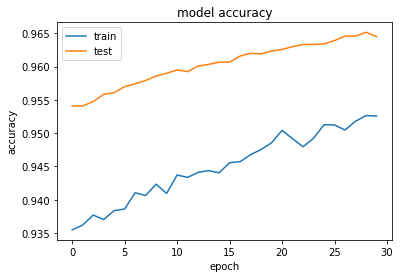

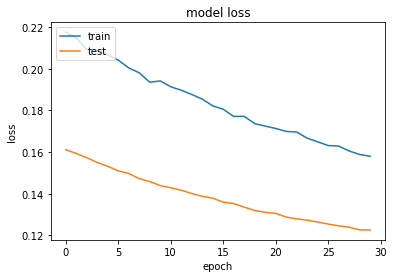

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# List all data in training
print(training.history.keys())

#summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
test_loss,test_acc = model_2.evaluate(X_test,Y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.9640
Test accuracy: 0.9639999866485596


5,

In [58]:
import tensorflow as tf

# In keras, layers are assembled to build a models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers

model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden,name = 'dense_Layer',input_shape = (784,),activation = 'relu'))

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden,name = 'dense_layer_2',activation = 'relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden,name = 'dense_layer_3',activation = 'relu'))
model_6.add(Dropout(0.3))

# After the first layer, you don't need to specify # the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10,name = 'dense_layer_4',activation = 'softmax'))

In [59]:
# compiling the model
model_6.compile(optimizer = 'RMSprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [60]:
# Training the model. 
log_dir = "logs/fit/model6"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training = model_6.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2,callbacks=tensorboard_callback) 

Epoch 1/30
375/375 [==============================] - 10s 28ms/step - loss: 0.3218 - accuracy: 0.9005 - val_loss: 0.1215 - val_accuracy: 0.9654
Epoch 2/30
375/375 [==============================] - 10s 26ms/step - loss: 0.1412 - accuracy: 0.9582 - val_loss: 0.1024 - val_accuracy: 0.9700
Epoch 3/30
375/375 [==============================] - 10s 26ms/step - loss: 0.1104 - accuracy: 0.9677 - val_loss: 0.1038 - val_accuracy: 0.9721
Epoch 4/30
375/375 [==============================] - 10s 26ms/step - loss: 0.0938 - accuracy: 0.9736 - val_loss: 0.0979 - val_accuracy: 0.9753
Epoch 5/30
375/375 [==============================] - 10s 25ms/step - loss: 0.0849 - accuracy: 0.9763 - val_loss: 0.1107 - val_accuracy: 0.9743
Epoch 6/30
375/375 [==============================] - 10s 25ms/step - loss: 0.0750 - accuracy: 0.9790 - val_loss: 0.0995 - val_accuracy: 0.9780
Epoch 7/30
375/375 [==============================] - 10s 25ms/step - loss: 0.0704 - accuracy: 0.9814 - val_loss: 0.1014 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


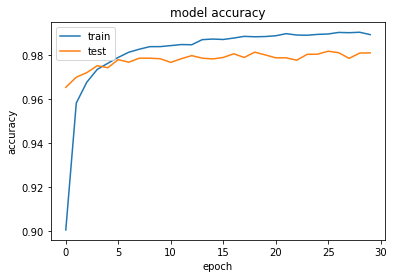

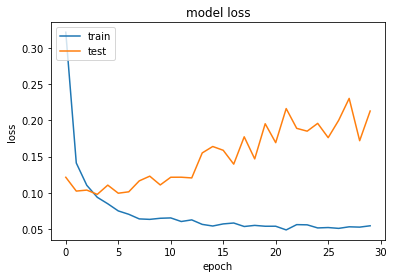

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.1577 - accuracy: 0.9831
Test accuracy: 0.9830999970436096


6,

7,

### **`.ipynb file 2`** 


**Marks: 15**
- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.
